Step 1: Load the Data

In [10]:
import pandas as pd
import numpy as np
import torch

# Load the tweet data
tweet_data_path = 'TweetData/final_tweets.csv'
tweets_df = pd.read_csv(tweet_data_path)

# Load the bill data
bill_data_path = 'BillData/final_bills.csv'
bills_df = pd.read_csv(bill_data_path)

# Load the tweet embeddings (PCA and non-PCA)
tweet_embeddings_pca_path = 'TweetData/roberta_tweets_embeddings_pca.npy'
tweet_embeddings_pca = np.load(tweet_embeddings_pca_path)

tweet_embeddings_non_pca_path = 'TweetData/roberta_tweets_embeddings_no_duplicates.npy'
tweet_embeddings_non_pca = np.load(tweet_embeddings_non_pca_path)

# Load the bill embeddings (PCA and non-PCA)
bill_embeddings_pca_path = 'BillData/roberta_bills_embeddings_pca.npy'
bill_embeddings_pca = np.load(bill_embeddings_pca_path)

bill_embeddings_non_pca_path = 'BillData/RoBERTa_bills_embeddings_no_duplicates.npy'
bill_embeddings_non_pca = np.load(bill_embeddings_non_pca_path)

# Load the sentiment tensors
tweet_sentiments_tensor_path = 'TweetData/roberta_tweets_sentiments_tensor.pt'
tweet_sentiments_tensor = torch.load(tweet_sentiments_tensor_path)

bill_sentiments_tensor_path = 'BillData/bills_sentiments_tensor.pt'
bill_sentiments_tensor = torch.load(bill_sentiments_tensor_path)

# Display the shapes of the dataframes and tensors
print(f'Tweets DataFrame Shape: {tweets_df.shape}')
print(f'Bills DataFrame Shape: {bills_df.shape}')
print(f'Tweet Embeddings PCA Shape: {tweet_embeddings_pca.shape}')
print(f'Tweet Embeddings Non-PCA Shape: {tweet_embeddings_non_pca.shape}')
print(f'Bill Embeddings PCA Shape: {bill_embeddings_pca.shape}')
print(f'Bill Embeddings Non-PCA Shape: {bill_embeddings_non_pca.shape}')
print(f'Tweet Sentiments Tensor Shape: {tweet_sentiments_tensor.shape}')
print(f'Bill Sentiments Tensor Shape: {bill_sentiments_tensor.shape}')

Tweets DataFrame Shape: (1174, 9)
Bills DataFrame Shape: (413, 12)
Tweet Embeddings PCA Shape: (1174, 293)
Tweet Embeddings Non-PCA Shape: (1174, 768)
Bill Embeddings PCA Shape: (413, 171)
Bill Embeddings Non-PCA Shape: (413, 768)
Tweet Sentiments Tensor Shape: torch.Size([1174, 3])
Bill Sentiments Tensor Shape: torch.Size([413, 3])


Step 2: Visualize Embeddings

To understand which embeddings provide the most diverse and meaningful connections, we will visualize the PCA and non-PCA embeddings using t-SNE plots.

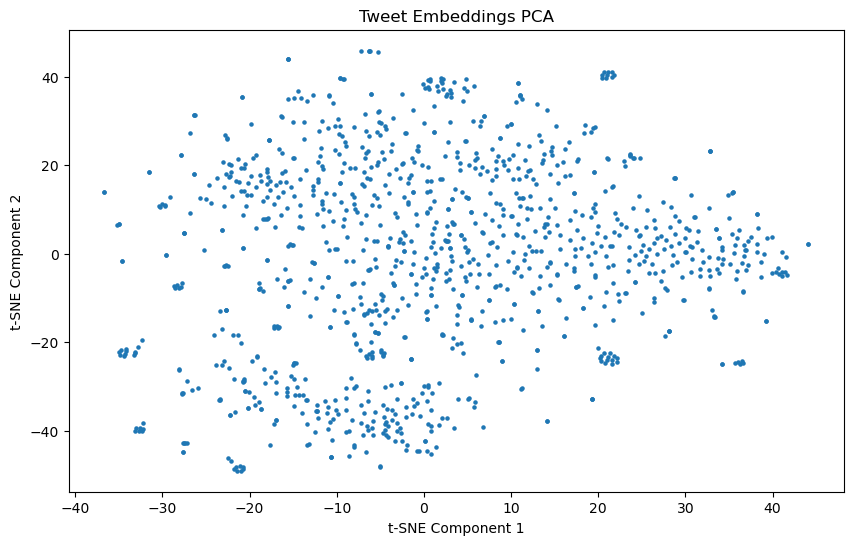

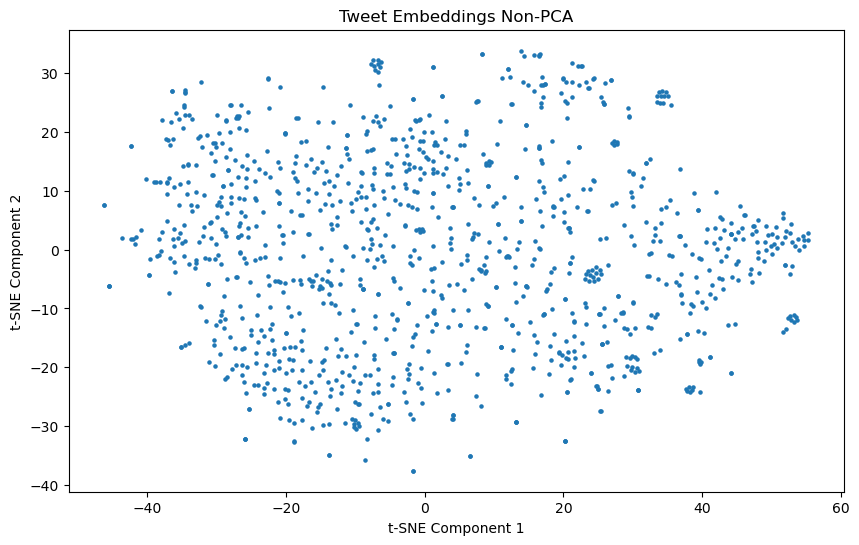

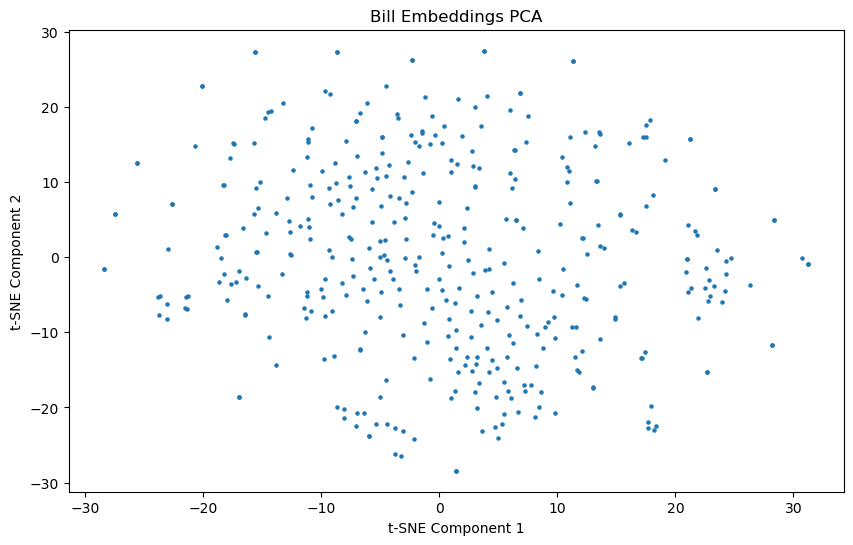

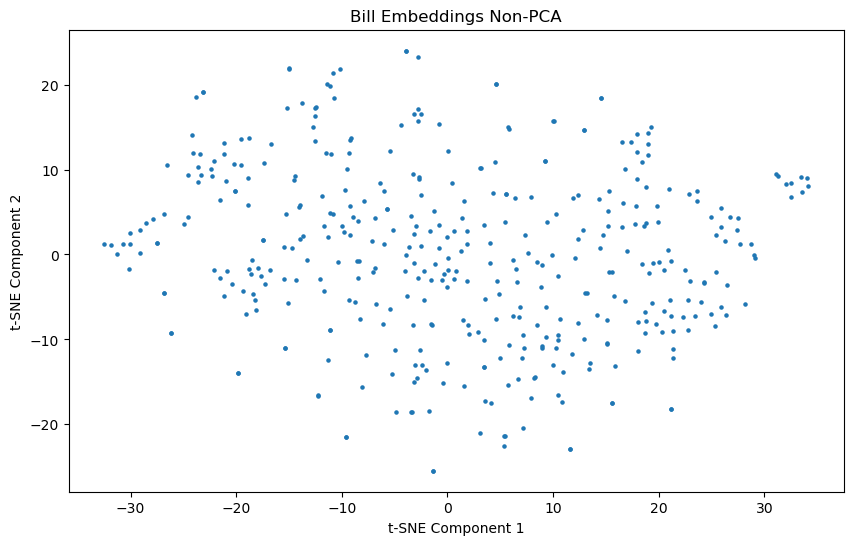

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Function to visualize embeddings using t-SNE


def visualize_embeddings(embeddings, title):
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=5)
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()


# Visualize tweet embeddings
visualize_embeddings(tweet_embeddings_pca, 'Tweet Embeddings PCA')
visualize_embeddings(tweet_embeddings_non_pca, 'Tweet Embeddings Non-PCA')

# Visualize bill embeddings
visualize_embeddings(bill_embeddings_pca, 'Bill Embeddings PCA')
visualize_embeddings(bill_embeddings_non_pca, 'Bill Embeddings Non-PCA')

Step 3: Evaluate Embedding Quality

We will evaluate the quality of the embeddings by calculating the average cosine similarity within each set of embeddings. This will help us understand how well the embeddings cluster together.

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate average cosine similarity


def average_cosine_similarity(embeddings):
    similarity_matrix = cosine_similarity(embeddings)
    avg_similarity = np.mean(similarity_matrix)
    return avg_similarity


# Calculate average cosine similarity for tweet embeddings
avg_similarity_tweets_pca = average_cosine_similarity(tweet_embeddings_pca)
avg_similarity_tweets_non_pca = average_cosine_similarity(
    tweet_embeddings_non_pca)

# Calculate average cosine similarity for bill embeddings
avg_similarity_bills_pca = average_cosine_similarity(bill_embeddings_pca)
avg_similarity_bills_non_pca = average_cosine_similarity(
    bill_embeddings_non_pca)

# Display the average cosine similarities
print(f'Average Cosine Similarity (Tweets PCA): {avg_similarity_tweets_pca}')
print(
    f'Average Cosine Similarity (Tweets Non-PCA): {avg_similarity_tweets_non_pca}')
print(f'Average Cosine Similarity (Bills PCA): {avg_similarity_bills_pca}')
print(
    f'Average Cosine Similarity (Bills Non-PCA): {avg_similarity_bills_non_pca}')

Average Cosine Similarity (Tweets PCA): 0.0004839993198402226
Average Cosine Similarity (Tweets Non-PCA): 0.9446992874145508
Average Cosine Similarity (Bills PCA): 0.00089712452609092
Average Cosine Similarity (Bills Non-PCA): 0.9240385293960571


Analysis
Cosine Similarity

    Tweets PCA: 0.000484
    Tweets Non-PCA: 0.944699
    Bills PCA: 0.000897
    Bills Non-PCA: 0.924039

The low cosine similarity in PCA embeddings suggests that PCA embeddings are more spread out and less homogeneous compared to non-PCA embeddings. This could be beneficial in creating diverse connections in the graph.

In [1]:
import pandas as pd


def load_and_analyze_tweet_dates(file_path):
    """
    Load tweet data from a CSV file and analyze the 'created_at' column to find
    the earliest and the most recent dates.

    Args:
    file_path (str): The path to the CSV file containing tweet data.

    Returns:
    tuple: A tuple containing the earliest and the most recent dates.
    """
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path, parse_dates=['created_at'])

        # Check if the 'created_at' column exists
        if 'created_at' not in df.columns:
            raise ValueError(
                "The 'created_at' column is not found in the CSV file.")

        # Get the earliest and the most recent dates
        earliest_date = df['created_at'].min()
        most_recent_date = df['created_at'].max()

        return earliest_date, most_recent_date

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None


# Define the path to the CSV file
file_path = 'TweetData/combined_tweets_data.csv'

# Load and analyze the tweet dates
earliest_date, most_recent_date = load_and_analyze_tweet_dates(file_path)

# Print the results
print(f"Earliest date: {earliest_date}")
print(f"Most recent date: {most_recent_date}")

Earliest date: 2024-02-13 14:19:00+00:00
Most recent date: 2024-03-12 20:59:47+00:00


In [2]:
import pandas as pd


def load_and_analyze_bill_dates(file_path):
    """
    Load bill data from a CSV file and analyze the 'status_date' column to find
    the earliest and the most recent dates.

    Args:
    file_path (str): The path to the CSV file containing bill data.

    Returns:
    tuple: A tuple containing the earliest and the most recent dates.
    """
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path, parse_dates=['status_date'])

        # Check if the 'status_date' column exists
        if 'status_date' not in df.columns:
            raise ValueError(
                "The 'status_date' column is not found in the CSV file.")

        # Get the earliest and the most recent dates
        earliest_date = df['status_date'].min()
        most_recent_date = df['status_date'].max()

        return earliest_date, most_recent_date

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None


# Define the path to the CSV file
file_path = 'BillData/refined_detailed_bills.csv'

# Load and analyze the bill dates
earliest_date, most_recent_date = load_and_analyze_bill_dates(file_path)

# Print the results
print(f"Earliest date: {earliest_date}")
print(f"Most recent date: {most_recent_date}")

Earliest date: 2022-12-23 00:00:00
Most recent date: 2024-04-18 00:00:00
